# **스테이지 6. 모델링 + 하이퍼파라미터 튜닝**

## (1) 앙상블 모델링

🎈피쳐엔지니어링도 마무리를 했으니 3가지 모델링을 만들어 성능비교를 해볼게요!<br>
가장 좋은 성능을 내는 모델로 최종 테스트 평가를 할 예정입니다.<br>
가장 좋은 모델은 없지만 가장 알맞는 모델은 찾을 수 있습니다.<br>
그래서 여러가지 모델을 통해 다양하게 학습을 시켜 테스트를 해볼 필요가 있지요!🎯<br>

### *앙상블 기법

앙상블 기법을 통해 여러개의 모델로 가장 정확한 값으로 최종예측을 해봅시다! <br>
강력한 하나의 모델을 사용하는 것 보다 약한 모델 여러개를 사용하여 더 정확한 예측에 도움을 줍니다. <br>
앙상블 기법의 종류에는 보팅(Voting),배깅(Bagging),부스팅(Boosting) 3가지가 유형으로 나눌 수 있습니다.<br>
그럼 하나씩 살펴볼까요?<br>

### 보팅(Voting)
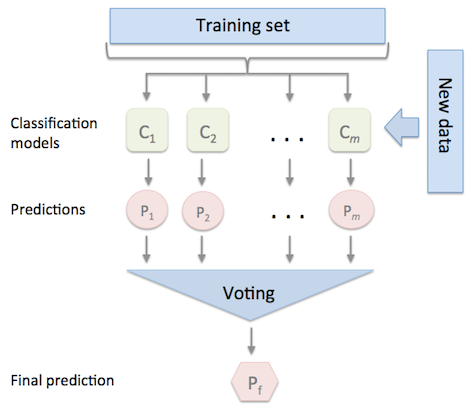

###### 출처 https://codingsmu.tistory.com/151#%EB%B-%B-%EA%B-%---Bagging%-B%--Bootstrap%--aggregating-

보팅은 그 단어에서 알 수 있듯이, 서로 다른 알고리즘을 가진 분류기 중 투표를 통하여<br>
최종 예측 결과를 결정하는 방식입니다. 알고리즘에는 흔히 알고 있는 결정트리(Decision tree)나<br>KNN(K-Nearest Neighbor),로지스틱(Logistic) 같은 걸 의미합니다.<br>

보팅은 최종 결과 선정 방식에 따라 하드 보팅(Hard Voting),소프트 보팅(Soft voting)두가지로 나뉩니다.

### 배깅(Bagging,Bootstrap aggregating)
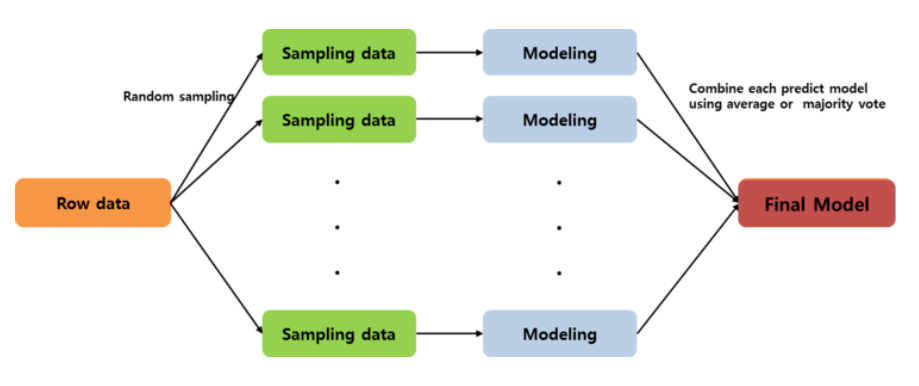
###### 출처 https://codingsmu.tistory.com/151#%EB%B-%B-%EA%B-%---Bagging%-B%--Bootstrap%--aggregating-

배깅은 bootstrap aggregating 의 줄임말로 주어진 데이터에 대해서 여러개의 bootstrap 자료를 <br>
생성하고 각 자료를 모델링한 후 결합하여 최종 예측 모형을 산출하는 방법입니다!<br>

이 때 bootstrap 자료란 원시 데이터(raw)로 부터 복원 임의 추출한 크기가 동일한 여러 개의<br> 표본 자료를 말합니다. 보팅과는 다르게 모두 같은 알고리즘 모델을 사용합니다.<br>

대표적으로 랜덤 포레스트 알고리즘을 사용하여 과적합(Overfitting) 방지에 효과적이며 수행속도가 빠른 장점을 가지고 있어요!

### 부스팅
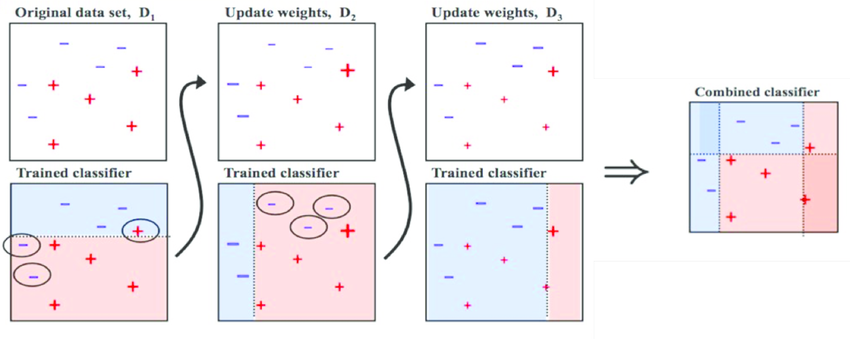
###### 출처: Medium (Boosting and Bagging explained with examples)

부스팅은 가중치를 활용하여 약한 분류기를 강한 분류기로 만드는 방법입니다.<br>
배깅은 Decision Tree1과 Decision Tree2 가 서로 독립적으로 결과를 예측한 후, 그 결과 값을 집계해<br>
최종적으로 결과 값을 예측하는 방식입니다.<br>

하지만, 부스팅은 모델 간 팀워크가 이루어진다고 생각하시면 됩니다.<br>
처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치를 부여하고, 부여된 가중치로 다시 재학습을 시킵니다.<br>
그래서 점차 분류기의 규칙과 성능을 반복학습을 통해 강화시켜나가는 방식이라고 보시면 됩니다.<br>

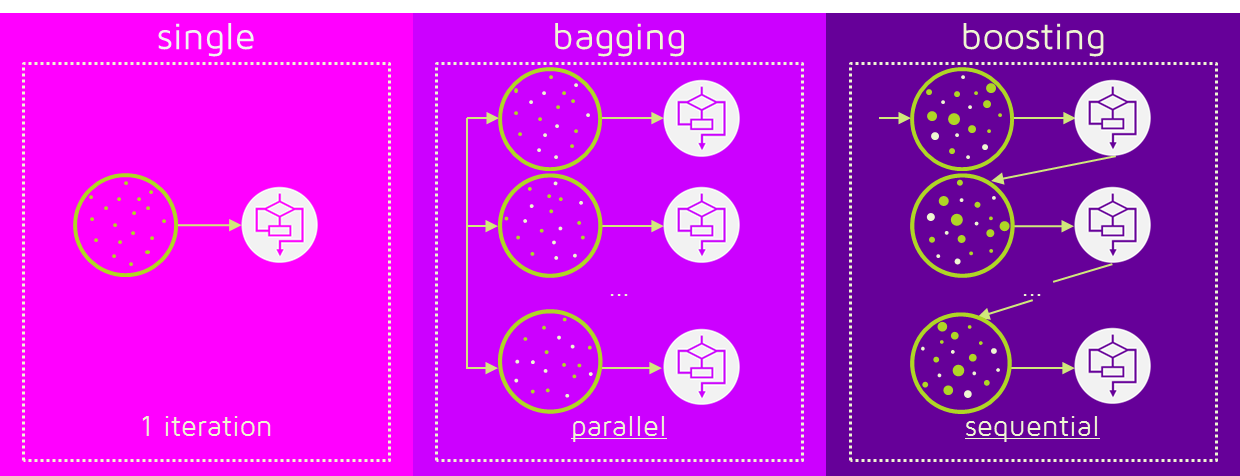

위의 그림으로 설명을 더 해보자면 배깅은 병렬로 학습하는 반면, 부스팅은 순차학습입니다.<br>
부스팅은 배깅에 비해 error가 더 적습니다. 즉 성능이 좋습니다. 그렇지만 속도가 느리고, 오버 피팅이 될 가능성도 있습니다.<br>
각 모델의 장단점을 보고, 상황에 맞는 모델을 선택하는 것이 좋습니다.
###### 출처: Medium (Boosting and Bagging explained with examples)



### 🎨1_의사결정나무
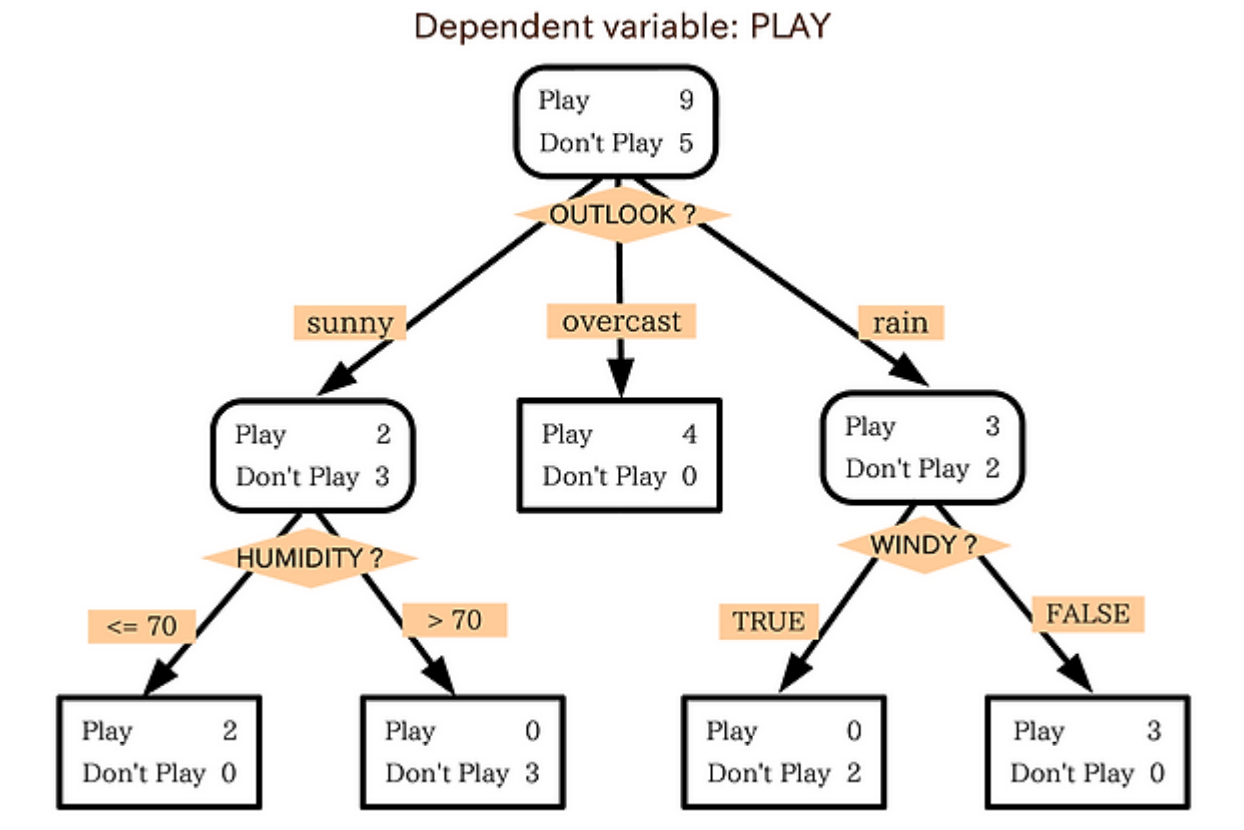
###### [출처]https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

**의사결정나무** 는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한<br>
규칙들의 조합으로 나타내며, 그 모양이 '나무' 와 같다고해서 의사결정 나무라 불려요!<br>
질문을 던져서 대상을 좁혀나가는 '스무고개' 와 같은 개념입니다.!<br>

##### 의사결정나무는 분류와 회귀 모두 가능합니다. <br>범주나 연속형 수치 모두 예측할 수 있다는 말 입니다.

코드실행을 직접해보도록 하겠습니다!
먼저 필요한 라이브러리들을 모두 import 해줄게요

<h4><<코드 실습>></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print(test)

      gender  car  reality  child_num  income_total  income_type  edu_type   
0          1    1        0          0     11.630709            1         4  \
1          0    0        1          0     11.813030            2         1   
2          0    0        1          0     11.147239            4         4   
3          1    1        0          0     11.630709            0         4   
4          0    1        1          0     12.323856            2         1   
...      ...  ...      ...        ...           ...          ...       ...   
9995       0    1        1          0     12.218495            4         2   
9996       1    1        1          0     12.218495            4         4   
9997       0    0        1          0     12.586220            4         4   
9998       0    1        0          0     12.100712            0         4   
9999       0    0        1          0     12.506177            4         1   

      family_type  house_type  DAYS_BIRTH  ...  work_phone  pho

In [4]:
print(train['credit'].value_counts()) #train['credit']을 value_counts()를 확인해보니 0,1,2 3가지로 나뉘어져 있네요

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


train 데이터를 기반으로 학습데이터와 검증데이터의 비율을 7 :3으로 분리하여<br>
train과 validation으로 분리합니다. 이때 stratify를 통해 데이터가 타깃 <br>
클래스의 비율을 반영하도록 설정합니다.

In [5]:
print(train.dtypes)

gender                   int64
car                      int64
reality                  int64
child_num                int64
income_total           float64
income_type              int64
edu_type                 int64
family_type              int64
house_type               int64
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
work_phone               int64
phone                    int64
email                    int64
occyp_type               int64
family_size            float64
begin_month            float64
credit                 float64
child_num_over_five       bool
duplicated_num           int64
before_employed        float64
house_owner               bool
dtype: object


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = train.select_dtypes(include=['object']).columns
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [7]:
X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y , test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

predict 메서드에 x_test 값을 주어 예측값을 pred 변수에 저장하겠습니다.
의사결정나무의 평가지표를 다양하게 출력하여 성능확인을 해볼게요!

**average:  다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수입니다.**



### -- 주요 average 옵션 --

None: 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다. 이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환합니다.

'micro': 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다. 전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있습니다.

'macro': 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급합니다.

'weighted': 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여 가중 평균을 계산하여 전체 평가 지표 값을 계산합니다. 클래스별 샘플 수가 다른 경우 유용합니다.

'samples': 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다.

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid,pred_1)
valid_acc_1 = accuracy_score(y_valid,pred_1)
valid_recall_1 = recall_score(y_valid,pred_1, average='weighted')
valid_precision_1 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_1 = f1_score(y_valid,pred_1, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100,2))
print("Recall(재현율): ", round(valid_recall_1*100,2))
print("Precision(정밀도): ", round(valid_precision_1*100,2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_1*100,2))



Confusion Matrix(혼동행렬): 
 [[ 323  141  180]
 [ 122  851  281]
 [ 203  310 2881]]


Accuracy(정확도):  76.63
Recall(재현율):  76.63
Precision(정밀도):  76.84
F1 Score(정밀도,리콜의 조화평균):  76.72


classification_report는 분류 모델의 성능을 종합적으로 평가하기 위한 함수로,<br>
scikit-learn 라이브러리에서 제공되는 기능 중 하나입니다.<br>
이 함수를 사용하면 정확도, 리콜, 정밀도, F1 스코어 등 다양한 평가 지표를 한 번에 출력할 수 있습니다.

In [9]:
from sklearn.metrics import classification_report

# y_valid는 실제 레이블을, pred_1은 모델의 예측 결과
report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       644
         1.0       0.65      0.68      0.67      1254
         2.0       0.86      0.85      0.86      3394

    accuracy                           0.77      5292
   macro avg       0.67      0.68      0.67      5292
weighted avg       0.77      0.77      0.77      5292



결정트리모델 결과를 내기까지 가장 중요하게 피쳐의 중요도를 계산해서 pandas Series 형태로 출력해 볼게요!

In [10]:
feature_importances = pd.Series(dt.feature_importances_,index=X_valid.columns).sort_values(ascending=False)
feature_importance = feature_importances.head(20)
print(feature_importance)

begin_month            0.201469
DAYS_EMPLOYED          0.125028
income_total           0.117220
DAYS_BIRTH             0.112723
before_employed        0.109601
duplicated_num         0.063891
occyp_type             0.058403
family_type            0.026662
edu_type               0.024559
family_size            0.022939
income_type            0.021437
phone                  0.019315
house_type             0.017584
car                    0.015802
gender                 0.014908
child_num              0.013827
reality                0.012043
work_phone             0.011346
email                  0.011243
child_num_over_five    0.000000
dtype: float64


featurn_importances 가 눈에 잘 들어오지 않습니다. matplotlib 라이브러리로 시각화를 해보도록  할게요

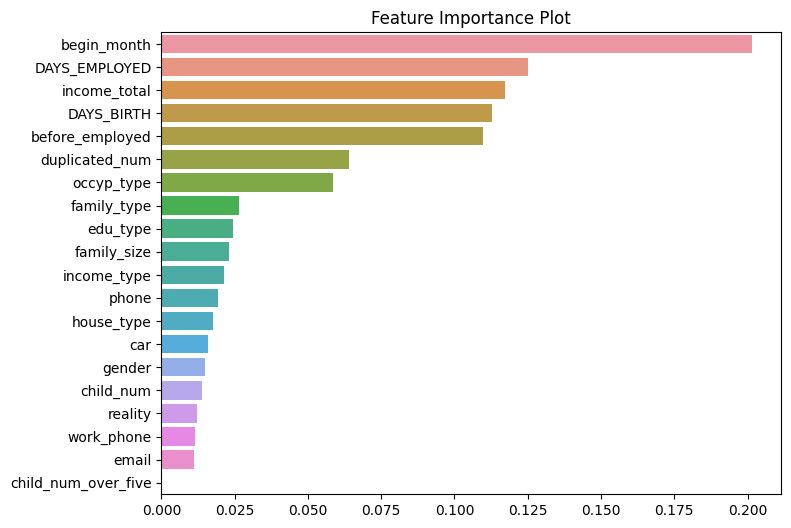

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()


가장 중요하게 고려한 피쳐는 begin_month네요<br>
그렇다면 log loss 로 모델 예측의 정확도를 확인해 볼게요!

In [12]:
from sklearn.metrics import log_loss
y_prob = dt.predict_proba(X_valid)
loss_1 =log_loss(y_valid, y_prob)
print("Log Loss: ", loss_1)

Log Loss:  8.366120114690295


아무래도 결정트리에서는 로스율이 좀 높다는 생각이 듭니다!<br>
그럼 두번째 모델로 랜덤포레스트를 배우고 학습해 비교해 볼게요!

### 🎨2_랜덤포레스트

<font color= pink>랜덤포레스트(Random Forest)</font>는 머신 러닝에서 사용되는 강력한 앙상블(Ensemble) 학습 알고리즘 중 하나입니다.<br>
랜덤 포레스트는 이러한 앙상블 학습의 일종으로, 여러 개의 의사결정 트리(Decision Tree)를 생성하고 이들을 조합하여 예측을 수행합니다.<br>
랜덤 포레스트의 작동 방식을 간단히 설명하면 다음과 같습니다:)

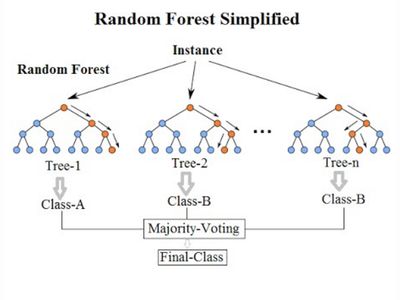

**부트스트랩 샘플링 (Bootstrap Sampling)** : 랜덤 포레스트는 원본 데이터에서 중복을 허용하여 여러 개의 부트스트랩 샘플(복원 추출)을 생성합니다.<br>
각 부트스트랩 샘플은 원본 데이터 크기와 동일하게 되지만, 무작위로 일부 데이터가 중복 선택됩니다.<br>

**의사결정 트리 생성** : 각 부트스트랩 샘플을 사용하여 여러 개의 의사결정 트리를 생성합니다. 의사결정 트리는 데이터를 기반으로 하위 그룹으로 분할하여 예측을 수행하는 모델입니다.<br>

**랜덤 특성 선택** : 의사결정 트리 생성 과정에서 각 노드에서 최적의 분할 특성을 선택할 때, 무작위로 일부 특성만을 고려합니다. 이를 통해 다양한 트리가 생성되고 상호 보완적인 예측을 할 수 있습니다.<br>

**다수결 투표 (Majority Voting)** : 생성된 모든 의사결정 트리들의 예측을 조합하여 최종 예측을 수행합니다. 분류(Classification) 문제에서는 다수결 투표로 가장 많은 트리가 예측한 클래스를 선택하고,<br>회귀(Regression) 문제에서는 평균 또는 중간값을 계산하여 예측합니다.

랜덤 포레스트의 주요 특징은 다음과 같습니다:)<br>
**과적합 줄임** : 부트스트랩 샘플링과 랜덤 특성 선택을 통해 모델의 과적합(Overfitting)을 줄이는 효과를 가져옵니다.<br>
**앙상블 효과**: 여러 개의 의사결정 트리를 조합하여 강력하고 안정적인 예측을 제공합니다.<br>
**특성 중요도 평가**: 각 트리에서 변수의 중요도를 평가하여 특성의 영향력을 평가할 수 있습니다.<br>
**다양한 데이터 타입 처리**: 범주형 변수와 연속형 변수를 함께 다룰 수 있습니다.<br>
랜덤 포레스트는 분류 및 회귀 문제에 널리 사용되며, 다양한 데이터에 대해 좋은 예측 성능을 보여주는 알고리즘 중 하나입니다.

##### 주요파라미터 <br>

<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th style="text-align:center">파라미터 명</th>
<th style="text-align:left">설명</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center"><strong>n_estimators</strong></td>
<td style="text-align:left">- 결정트리의 갯수를 지정<br> - Default = 10<br>- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음</td>
</tr>
<tr>
<td style="text-align:center"><strong>min_samples_split</strong></td>
<td style="text-align:left">- 노드를 분할하기 위한 최소한의 샘플 데이터수 <br> → 과적합을 제어하는데 사용<br> - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가</td>
</tr>
<tr>
<td style="text-align:center"><strong>min_samples_leaf</strong></td>
<td style="text-align:left">- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>- min_samples_split과 함께 과적합 제어 용도<br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_features</strong></td>
<td style="text-align:left">- 최적의 분할을 위해 고려할 최대 feature 개수<br>- Default = 'auto' (결정트리에서는 default가 none이었음)<br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_depth</strong></td>
<td style="text-align:left">- 트리의 최대 깊이<br>- default = None<br> → 완벽하게 클래스 값이 결정될 때 까지 분할<br>또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_leaf_nodes</strong></td>
<td style="text-align:left">리프노드의 최대 개수</td>
</tr>
</tbody>
</table>

</div>

주요 파라미터를 간단하게 알아보았습니다.
그럼 이제 코드 실습을 통해서 모델 생성 부터 학습, 예측결과까지 해보면서<br>
실전을 느껴볼게요!

<h4><<코드 실습>></h4>

**RandomForestClassifier**로 모델생성 후 fit 메서드로 학습, predict 메서드로 X_valid 데이터에 대한 예측값을 pred 에 저장<br>
score메서드로 평균 정확도를 체크해 볼게요

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

#모델 학습 및 예측
pred_2 = rf.fit(X_train, y_train).predict(X_valid)

#정확도 평가
accuracy = accuracy_score(y_valid, pred_2)
print(f'RandomForestClassifier 정확도: {accuracy:.4f}')


RandomForestClassifier 정확도: 0.8154


정확도가 나왔네요! 그러면 사이킷런에서 제공하는 함수와 클래스로 <br>
모델의 성능을 평가해 보도록 할게요!

In [14]:
pred_2 = rf.predict(X_valid)
valid_cm_2 = confusion_matrix(y_valid,pred_2)
valid_acc_2 = accuracy_score(y_valid,pred_2)
valid_recall_2 = recall_score(y_valid,pred_2, average='weighted')
valid_precision_2 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_2 = f1_score(y_valid,pred_2, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_2)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_2*100,2))
print("Recall(재현율): ", round(valid_recall_2*100,2))
print("Precision(정밀도): ", round(valid_precision_2*100,2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_2*100,2))


Confusion Matrix(혼동행렬): 
 [[ 272   95  277]
 [  29  817  408]
 [  51  117 3226]]


Accuracy(정확도):  81.54
Recall(재현율):  81.54
Precision(정밀도):  76.84
F1 Score(정밀도,리콜의 조화평균):  80.25


In [15]:
#변수 중요도 계산 
import pandas as pd

importtances_values = pd.Series(rf.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
fr_top20 = importtances_values.head(20)
fr_top20

begin_month            0.207786
DAYS_BIRTH             0.116020
before_employed        0.115361
DAYS_EMPLOYED          0.096652
duplicated_num         0.095870
income_total           0.093134
occyp_type             0.055866
family_type            0.026590
family_size            0.022647
edu_type               0.021673
income_type            0.021251
phone                  0.018305
car                    0.017949
reality                0.017703
child_num              0.017245
gender                 0.016849
house_type             0.015079
work_phone             0.014286
email                  0.009712
child_num_over_five    0.000025
dtype: float64

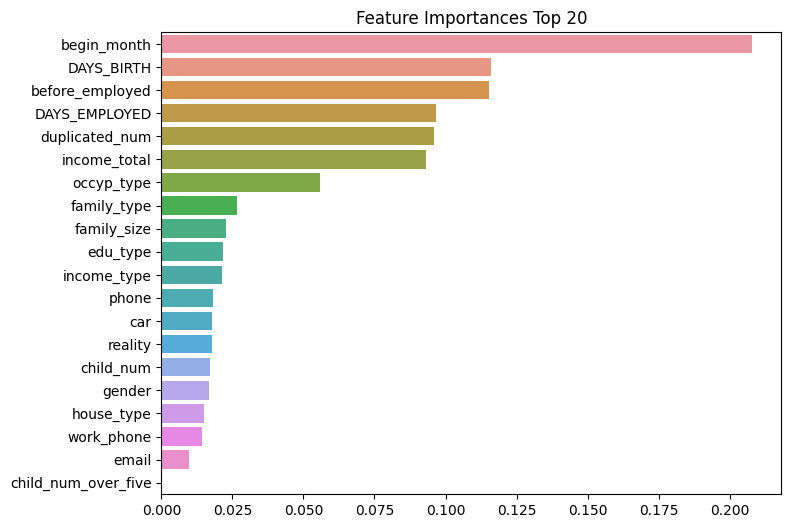

In [16]:
#변수중요도 시각화

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=fr_top20, y=fr_top20.index)
plt.show()


랜덤포레스트 모델도 중요한 피쳐로 begin_month를 보고 있네요!<br>
그렇다면 예측은 잘 했을까요? log_loss로 예측해볼게요!

In [17]:
from sklearn.metrics import log_loss
y_prob = rf.predict_proba(X_valid)
loss_2 = log_loss(y_valid, y_prob)
print("Log Loss: ", loss_2)

Log Loss:  0.49655865076610145


wow! 랜덤포레스트 모델에서 확실히 loss 율이 줄어든 것을 볼 수 있습니다!<br>
아무래도 조금 더 복잡한 모델일수록 더 좋은 성능을 보이는 것 같습니다.<br>

그렇다면 또 다른 모델로 학습과 로스율을 보도록 하겠습니다~!<br>

이번에는 앞에서 잠깐 설명드렸던 부스팅 중 하나 입니다!

### 🎨3_XGB부스트


XGBoost(Extreme Gradient Boosting)은 그래디언트 부스팅(Gradient Boosting) 알고리즘을<br>분산환경에서도 실행할 수 있도록 구현해놓은 머신러닝 라이브러리입니다.<br>
그래디언트 부스팅은 약한 예측 모델(Weak Learner)들을 <br>조합하여 강력한 예측 모델을 만드는 앙상블 기법 중 하나로, XGBoost는 이를 발전시킨 알고리즘입니다.

xgb부스트의 주요 특징과 동작 원리를 간단히 설명해 드릴게요!

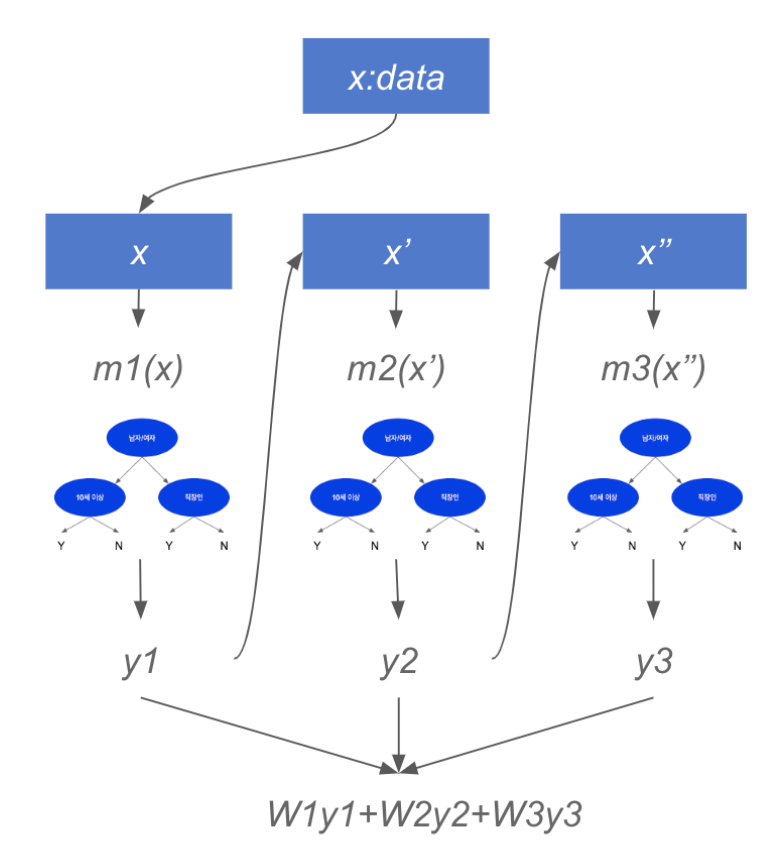

위와 같이 boosting 기법은 bagging 과는 달리 m1~m3의 모델이 있을 때, m1 에서는 x에서 샘플링된<br> 데이터를 넣고 그 결과중 예측이 잘못된 x중의 값들에 가중치를 반영해서 다음 모델인 m2 에 넣습니다.<br> 마찬가지로 y2 결과에서 예측이 잘못된 x'에 값들에 가중치를 반영해서 m3 에 넣습니다.<br> 그리고 각 모델의 성능이 다르기 때문에, 각 모델에 가중치W 를 반영하여 XGBoost Prediction 을 예측합니다.

XGBoost는 성능이 좋고, 컴퓨팅 지원 활용률이 좋아서 근래에 많이 사용되고 있고, 특히 Kaggle 상위<br> 랭커들이 많이 사용하면서 더 유명해지고 있습니다.(✿◡‿◡)<br>

랜덤포레스트보다 훨씬 빠른 속도와 더 좋은 성능을 보여주기도 하며 최근 가장 인기 있는 모델이기 도합니다.<br> 부스팅 알고리즘 중 가장 먼저 개발되기도 했고, 가장 널리 활용되고 있지요!

### xgboost 설치방법

#anaconda prompt 실행 후 pip install xgboost 입력 <br>
**pip install xgboost**

 XGBClassifier 로 모델을 생성한 뒤, fit 메서드로 데이터를 학습하고<br>
 predict 메서드로 x_valid 데이터에 대한 예측값을 pred 에 저장합니다.<br>
 score 메서드로 평균 정확도까지 측정해볼까요?


<h4><<코드 실습>></h4>

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
pred_3 = xgb.fit(X_train, y_train).predict(X_valid) #모델 학습 및 예측
print("Accuracy:", xgb.score(X_valid, y_valid)) #정확도 평가

Accuracy: 0.723167044595616


정확도는 0.72 가 나왔네요!
그렇다면 다양한 성능지표로 모델의 예측성능도 평가해 보겠습니다.

In [19]:
pred_3 = xgb.predict(X_valid)
valid_cm_3 = confusion_matrix(y_valid,pred_3)
valid_acc_3 = accuracy_score(y_valid,pred_3)
valid_recall_3 = recall_score(y_valid,pred_3, average='weighted')
valid_precision_3 = precision_score(y_valid,pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid,pred_3, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_3)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_3*100,2))
print("Recall(재현율): ", round(valid_recall_3*100,2))
print("Precision(정밀도): ", round(valid_precision_3*100,2))
print("F1 Score(정밀도,재현율의 조화평균): ", round(valid_f1_3*100,2))

Confusion Matrix(혼동행렬): 
 [[  90   79  475]
 [  18  444  792]
 [  35   66 3293]]


Accuracy(정확도):  72.32
Recall(재현율):  72.32
Precision(정밀도):  71.84
F1 Score(정밀도,재현율의 조화평균):  67.3


이번에는 변수 중요도를 살펴볼게요!

In [20]:
xgb_importances_values = xgb.feature_importances_
xgb_importances_values

array([0.03532011, 0.04608109, 0.04276669, 0.04204773, 0.04579745,
       0.04139628, 0.04715922, 0.05050854, 0.05041166, 0.05169708,
       0.05418397, 0.05758152, 0.05462679, 0.04661646, 0.04812541,
       0.0386807 , 0.12717871, 0.        , 0.06772235, 0.0520982 ,
       0.        ], dtype=float32)

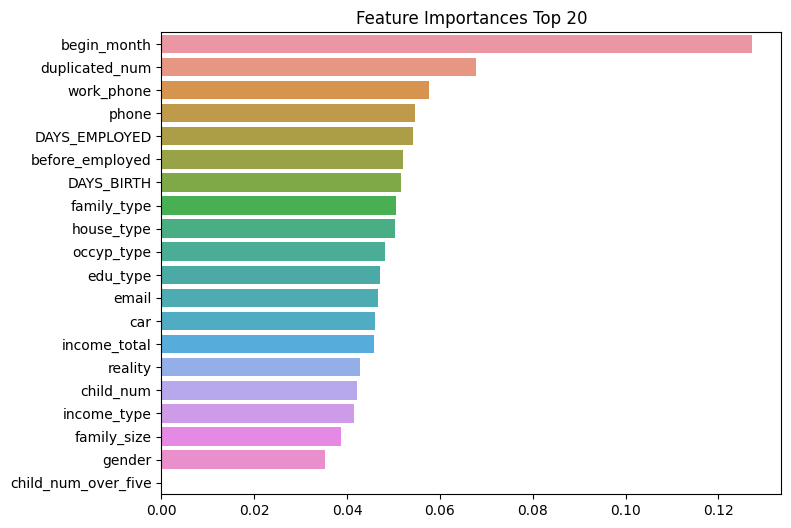

In [21]:
#변수명이  필요하겠네요! 시각화까지 해볼게요

xgb_importances = pd.Series(xgb_importances_values, index=X_valid.columns).sort_values(ascending=False)
xgb_top20 = xgb_importances.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=xgb_top20, y=xgb_top20.index)
plt.show()


xgboost모델에서도 특성중요도가 BEGIN_MONTH 가 나왔습니다!<br>
또 로스율을 계산해 볼게요. 예측은 잘 해낼까요?

In [22]:
#log_loss

from sklearn.metrics import log_loss
y_prob = xgb.predict_proba(X_valid)
loss_3 = log_loss(y_valid, y_prob)
print("Log Loss: ", loss_3)

Log Loss:  0.6440865091927743


랜덤포레스트에 비해 loss는 살짤 높게 나왔습니다!<BR>
그렇다면 마지막 모델로 LightGBM 모델을 사용해 보도록 하겠습니다.

### 🎨4_LightGBM

lightgbm에서 gbm 은 Gradient Boosting Model 로 , Tree를 기반으로 하는 학습 알고리즘이예요.<br>
이 모델 또한 틀린 부분에 가중치를 더하면서 진행하는 방법으로 XGBoost 와 비슷하게 느껴질 수 있습니다.<br>

lightgbm은 두가지 분할로 나누어 볼 수 있는데,<br>
리프 기준 분할과 트리 기준 분할 입니다. 

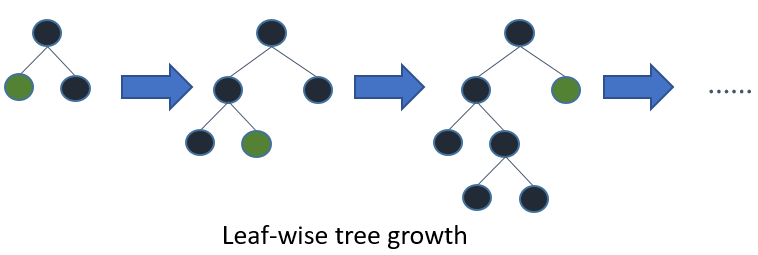<br>
[리프기준분할]


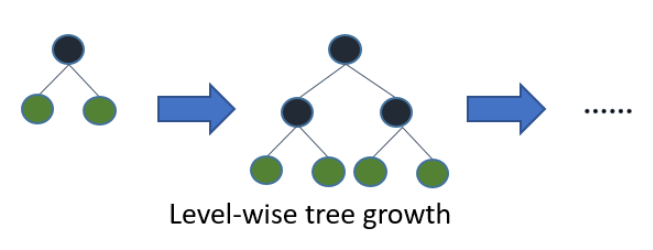<br>
[트리기준분할]

LightGBM은 트리 기준 분할이 아닌 리프 기준 분할 방식을 사용합니다.<br>
트리의 균형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성하고,<br>
이렇게 하면 트리 기준 분할 방식에 비해 예측 오류 손실을 최소화할 수 있습니다. 

lightgbm 파라미터

<table style="border-collapse: collapse; width: 100%;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr>
<td style="width: 25.6589%; text-align: center;">파라미터</td>
<td style="width: 14.7286%; text-align: center;">default</td>
<td style="width: 59.6124%; text-align: center;">설명</td>
</tr>
<tr>
<td style="width: 25.6589%;">num_iterations</td>
<td style="width: 14.7286%; text-align: center;">100</td>
<td style="width: 59.6124%;">반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)</td>
</tr>
<tr>
<td style="width: 25.6589%;">objective</td>
<td style="width: 14.7286%; text-align: center;">regression</td>
<td style="width: 59.6124%;">수치예측이면 regression, 이진분류이면 binary</td>
</tr>
<tr>
<td style="width: 25.6589%;">learning_rate</td>
<td style="width: 14.7286%; text-align: center;">0.1</td>
<td style="width: 59.6124%;">부스팅 스탭 반복할 때 학습률, 0~1 사이의 값</td>
</tr>
<tr>
<td style="width: 25.6589%;">max_depth</td>
<td style="width: 14.7286%; text-align: center;">1</td>
<td style="width: 59.6124%;">트리의 깊이</td>
</tr>
<tr>
<td style="width: 25.6589%;">min_data_in_leaf</td>
<td style="width: 14.7286%; text-align: center;">20</td>
<td style="width: 59.6124%;">한 리프의 최소 데이터 수<br>(decision tree의 min_sample_leaf와 동일, 오버피팅 제어)</td>
</tr>
<tr>
<td style="width: 25.6589%;">num_leaves</td>
<td style="width: 14.7286%; text-align: center;">31</td>
<td style="width: 59.6124%;">하나의 트리가 가질 수 있는 최대 리프 개수</td>
</tr>
<tr>
<td style="width: 25.6589%;">boosting</td>
<td style="width: 14.7286%; text-align: center;">gbdt</td>
<td style="width: 59.6124%;">부스팅 방법 (gbdt: Gradient Boosting DecisionTree / rf: RandomForest)</td>
</tr>
<tr>
<td style="width: 25.6589%;">bagging_fraction</td>
<td style="width: 14.7286%; text-align: center;">1.0</td>
<td style="width: 59.6124%;">데이터 샘플링 비율, 오버피팅 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">feature_fraction</td>
<td style="width: 14.7286%; text-align: center;">1.0</td>
<td style="width: 59.6124%;">개별 트리 학습 시 무작위로 선택하는 feature의 비율</td>
</tr>
<tr>
<td style="width: 25.6589%;">lambda_l1</td>
<td style="width: 14.7286%; text-align: center;">0.0</td>
<td style="width: 59.6124%;">L1 regulation 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">lambda_l2</td>
<td style="width: 14.7286%; text-align: center;">0.0</td>
<td style="width: 59.6124%;">L2 regulation 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">metric</td>
<td style="width: 14.7286%; text-align: center;">""</td>
<td style="width: 59.6124%;">성능평가를 어떤 것으로 할 것인지 (auc, l1, l2 등)</td>
</tr>
</tbody>
</table>

num_leaves: 클수록 정확도는 높아지지만 오버피팅 발생 가능

min_data_in_leaf: 클수록 오버피팅 방지

max_depth: 위 두개 파라미터와 결합하여 오버피팅 방지

objective: 사용하는 데이터셋의 타겟팅 값의 형태에 따라 조정 필요

metric: 성능 평가를 어떤 것으로 할 것인지 조정 필요 

**LightGBM 장단점**

 

장점

1. 학습하는데 시간이 짧다. (통상 XGBoost 학습속도의 1.3~1.5배)

2. 메모리 사용량이 상대적으로 적다.

3. 대용량 데이터 처리 가능

 

단점

1. 적은 데이터셋(공식문서 기준 만건 이하)에서는 오버피팅 발생 가능

자, 그럼 이제 모델을 만들어서 코드 실습을 해보도록 할게요!

<h4><<코드 실습>></h4>

##### 먼저 LightGBM 설치하기
- cmd 터미널 혹은 아나콘다 프롬프트 사용
- conda install -c anaconda lightgbm
- y 입력
- 혹은 python 환경에서 pip install lightgbm / pip3 install ligthtgbm <br>
※윈도우 환경의 경우 Visual Studio Build Tool 2015이상이 설치되어 있어야 합니다.

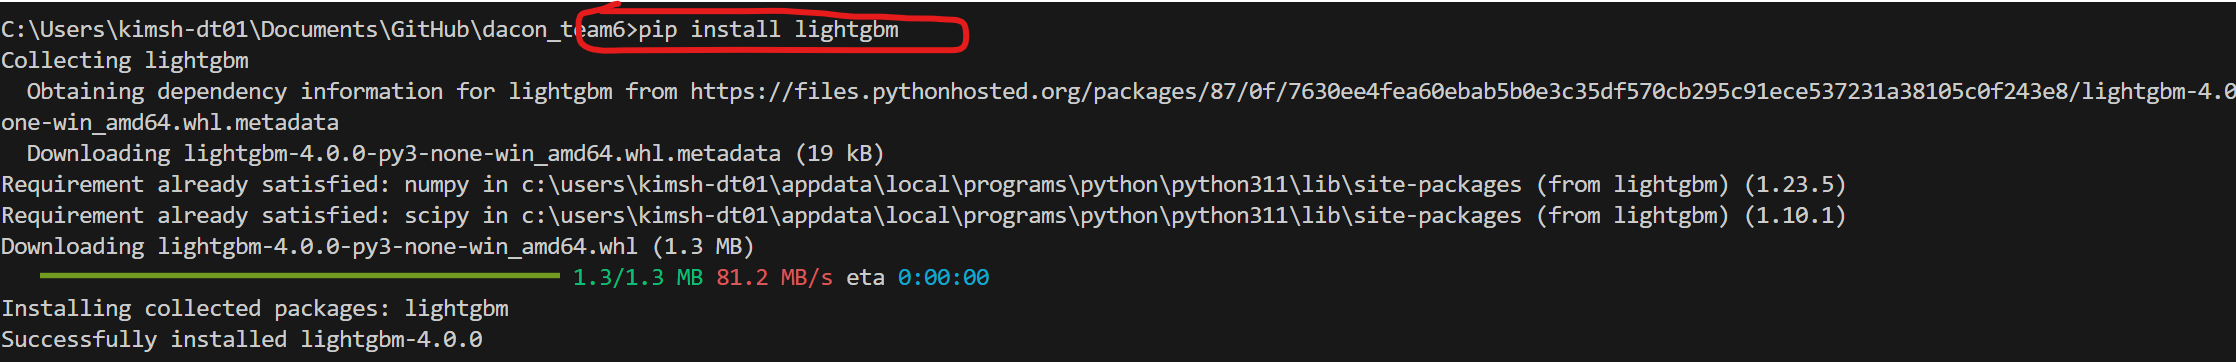

설치가 완료되었으니, import 해볼까요?

In [23]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
pred_4 = lgbm.fit(X_train, y_train).predict(X_valid)
print("Accuracy:", lgbm.score(X_valid,y_valid))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 19
[LightGBM] [Info] Start training from score -2.105335
[LightGBM] [Info] Start training from score -1.440314
[LightGBM] [Info] Start training from score -0.444193
Accuracy: 0.7203325774754347


평균정확도가 0.72 나왔네요!<br>
그렇다면 lightgbm 모델도 성능지표로 모델의 예측성능을 평가해 보도록 할게요!

In [24]:
pred_4 = xgb.predict(X_valid)
valid_cm_4 = confusion_matrix(y_valid,pred_4)
valid_acc_4 = accuracy_score(y_valid,pred_4)
valid_recall_4 = recall_score(y_valid,pred_4, average='weighted')
valid_precision_4 = precision_score(y_valid,pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid,pred_4, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_4)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_4*100,2))
print("Recall(재현율): ", round(valid_recall_4*100,2))
print("Precision(정밀도): ", round(valid_precision_4*100,2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_4*100,2))

Confusion Matrix(혼동행렬): 
 [[  90   79  475]
 [  18  444  792]
 [  35   66 3293]]


Accuracy(정확도):  72.32
Recall(재현율):  72.32
Precision(정밀도):  71.84
F1 Score(정밀도,리콜의 조화평균):  67.3


다음은 변수중요도를 통해 예측에 사용된 변수들 중 타깃변수에 가장 많은 영향을 준 변수가 무엇인지 살펴볼게요!

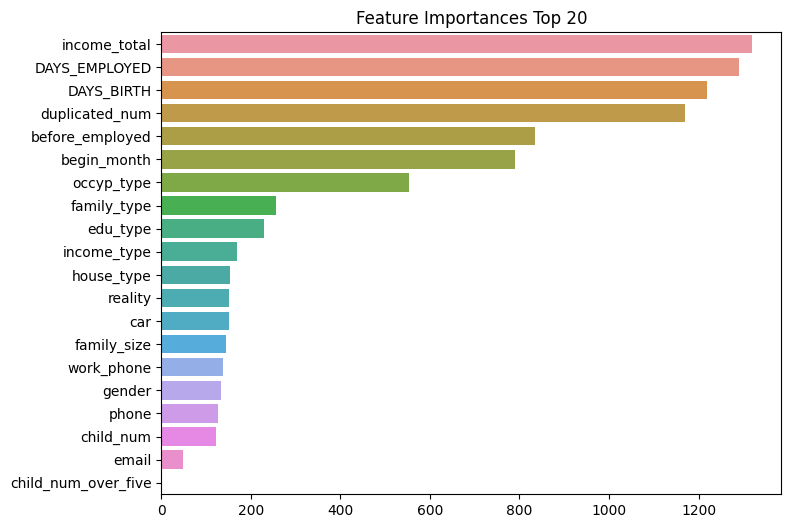

In [25]:
light_importaces_values = lgbm.feature_importances_
light_importaces = pd.Series(light_importaces_values, index=X_valid.columns).sort_values(ascending=False)
light_top20 = light_importaces.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=light_top20, y=light_top20.index)
plt.show()


lightgbm 모델에서는 특성중요도를 DAYS_BIRTH 로 보았군요!
역시 여러가지 모델로 학습을 해보는게 다양한 인사이트를 주는 것 같습니다!

In [26]:
#log_loss

from sklearn.metrics import log_loss
y_prob = lgbm.predict_proba(X_valid)
loss_4 = log_loss(y_valid, y_prob)
print("Log Loss: ", loss_4)


Log Loss:  0.6669427482235182


log_loss까지 보았습니다!<br>

😎짜란~ 여기까지 모두 수고많으셨습니다!! <br>
지금까지 총 4가지의 모델로 앙상블학습을 해보았는데,<br>
이제 이 모든 모델들을 종합해 보아야겠죠?<br>

마지막으로 달려가 볼까요? 모델별 f1_score, log_loss를 비교해서<br>
가장 성능이 좋은 모델을 골라볼까요?

In [27]:
#f1_score 비교

print('의사결정나무\t{}%'.format(round(valid_f1_1 *100,2)))
print('랜덤포레스트\t{}%'.format(round(valid_f1_2 *100,2)))
print('XGBoost\t\t{}%'.format(round(valid_f1_3 *100,2)))
print('LightGBM\t{}%'.format(round(valid_f1_4 *100,2)))

의사결정나무	76.72%
랜덤포레스트	80.25%
XGBoost		67.3%
LightGBM	67.3%


랜덤포레스트가 80%로 f1_score이 가장 높아 가장 좋은 성능을 낸다고 봐도 되겠습니다. <br>
그렇다면 이제 Logloss 를 통해 성능지표를 확인해 보겠습니다.<br>

In [29]:
#predict_proba : 각 클래스에 대한 예측 확률값을 반환

pred_1_1 = dt.predict_proba(X_train)
pred_2_1 =rf.fit(X_train, y_train).predict_proba(X_train)
pred_3_1 =xgb.fit(X_train, y_train).predict_proba(X_train)
pred_4_1 =lgbm.fit(X_train, y_train).predict_proba(X_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 19
[LightGBM] [Info] Start training from score -2.105335
[LightGBM] [Info] Start training from score -1.440314
[LightGBM] [Info] Start training from score -0.444193


In [31]:
# log_loss 정리

print('의사결정나무\t{}%'.format(loss_1))
print('랜덤포레스트\t{}%'.format(loss_2))
print('XGBoost\t\t{}%'.format(loss_3))
print('LightGBM\t{}%'.format(loss_4))



의사결정나무	8.366120114690295%
랜덤포레스트	0.49655865076610145%
XGBoost		0.6440865091927743%
LightGBM	0.6669427482235182%


Logloss 는 수치가 낮을 수록 더 좋습니다.<br>
여기에서는 랜덤포레스트가 가장 낮아 적합한 모델이라고 판단되네요!<br>

그럼 최종적으로 하이퍼 파라미터 튜닝을 시작해 보도록 하겠습니다!<br>
렛츠 기릿!

## (2) 하이퍼 파라미터 튜닝

하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해주어야 하는 값입니다.

우선, 왜 하이퍼 파라미터 튜닝을 해야할까요?

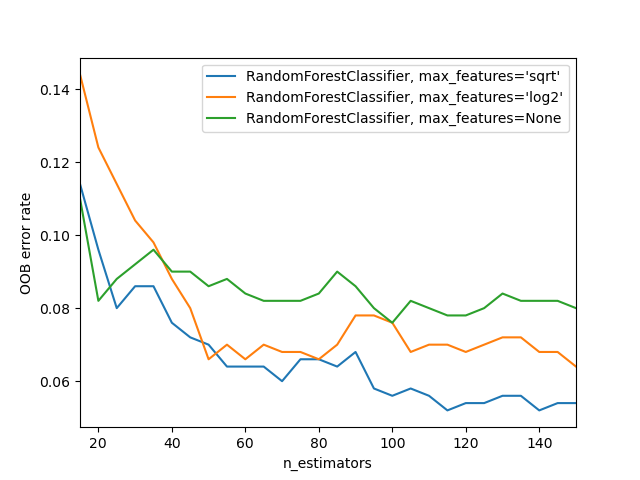
###### [출처]https://velog.io/@emseoyk/%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9D


위의 그래프를 보면 모델은 모두 랜덤포레스트이지만, max_features 변수를 다르게 설정하여<br>
OOB error 가 모두 다른 것을 볼 수 있습니다.<br>

모두 같은 모델을 사용했지만 하이퍼 파라미터 튜닝에 따라 모델의 성능이 달라질 수 있기 때문이죠!<br>

[모델을 최적화하기 위해 하이퍼파라미터를 조정하는 과정
‘hyperparameter optimization’이라고도 함]



2.1 수동으로 매개변수 조정<br>

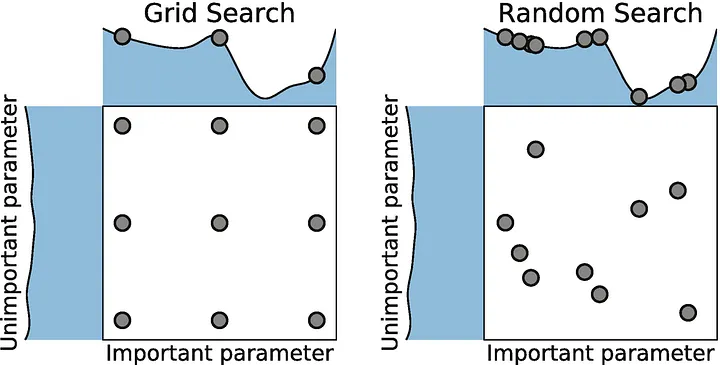

일반적으로 그리드서치, 랜덤 서치가 있습니다.<br>

- 그리드 서치 : 그리드 서치는 각 매개변수의 후보를 정하고 이들 조합을 모두 계산하는 방법입니다.<br>
탐색할 매개변수의 후보를 파악하기는 쉽지만, 조합에 따른 탐색점 수가 방대해지므로 탐색할 매개변수나<br>
그 후보의 수를 많이 지정하기는 어렵습니다.<br>

- 랜덤 서치 : 랜덤 서치는 각 매개변수의 후보를 정하고 매개변수별로 랜덤하게 선택한 조합을 만듭니다.<br>
그리고 계산 과정에서 설정한 횟수만큼 반복하는 방법입니다.<br>
매개변수의 후보로 분포를 지정할 수 있고, 어떤 매개변수에 대해 일정 범위의 균등분포에서 선택할 수 있습니다.<br>

일반적으로 그리드 서치보다 랜덤 서치의 효율이 더 높다고 합니다. 문제마다 어떤 매개 변수가 중요한지도 다르며,<br>
또한 각 문제에서 중요한 매개변수가 소수인 상황에서는 동일한 탐색 횟수일 때 랜덤 서치 쪽이 중요한 매개변수에 대해 더 많은 후보를 탐색할 수 있기 때문입니다.




그 밖에도 아래와 같이 다양한 하이퍼 파라미터 종류들이 있습니다.<br>

- Manual Search
- Grid Search
- Random Search
- Bayesian Optimization
- Non-Probabilistic
- Evolutionary Optimization
- Gradient-based Optimization
- Early Stopping

[그리스 서치 cv 의 주요 파라미터 설명하기]

In [32]:
#GridSearchCV 이용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#파라미터를 딕셔너리로 설정

params_dict = {
    'n_estimators' : [200,500],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini','entropy']
    
}

In [33]:
#param_grid 하이퍼 파라미터를 3개의 train,valid set fold 로 나누어 테스트 수행

grid_rf = GridSearchCV(rf, param_grid=params_dict, cv=3)

#param_grid 의 하이퍼 파라미터를 순차적으로 학습/평가
grid_rf.fit(X_train,y_train)

c:\Users\kimsh-dt01\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kimsh-dt01\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kimsh-dt01\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [34]:
#GridSearchCV 결과를 추출해 데이터 프레임으로 변환

score_df = pd.DataFrame(grid_rf.cv_results_)

In [35]:
score_df[['params','mean_test_score','rank_test_score']].tail()

,params,mean_test_score,rank_test_score
55,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.692984,1
56,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.692842,10
57,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.692984,1
58,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.692842,10
59,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.692984,1


rank_test_score 점수가 가장 낮은 곳의 params 가 최적의 파라미터겠네요!

In [36]:
score_df[['params']]

,params
0,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
2,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
4,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
5,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
6,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
7,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
8,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
9,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."


In [37]:
# params 열의 딕셔너리의 key에 접근하는 함수
def get_keys(dictionary):
    return list(dictionary.keys())

# apply 함수를 사용하여 params 열의 딕셔너리 key에 접근
score_df['keys'] = score_df['params'].apply(get_keys)

# 결과 출력
print(score_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0        0.988364      0.008610         0.067486        0.000468  \
1        2.383964      0.011304         0.170868        0.002848   
2        0.935169      0.010053         0.067805        0.000816   
3        2.343748      0.006368         0.167207        0.002852   
4        0.930849      0.004485         0.069478        0.001714   
5        2.343083      0.013052         0.187489        0.026104   
6        1.113025      0.009175         0.075131        0.001879   
7        2.782878      0.022499         0.183852        0.002358   
8        1.098073      0.014471         0.074124        0.000937   
9        2.757623      0.009412         0.183177        0.003291   
10       1.112702      0.007531         0.073468        0.000470   
11       2.845809      0.029266         0.187186        0.000927   
12       1.355981      0.013992         0.081791        0.001384   
13       3.268874      0.051241         0.204131

In [38]:
#최적의 파라미터를 알려줌

grid_rf.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

결과를 해석해보면,<br>
- params_dict 칼럼에는 매 수행시 적용된 개별 하이퍼 파라미터 값을 나타냅니다.<br>
- mean_test_scroe 는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 값이에요.
- rank_test_score 는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냅니다. 1이 가장 뛰어난 순위이고,<br>
이 때의 파라미터가 최적의 파라미터라고 볼 수 있죠!

그렇다면 최적값을 모델에 바로 적용해 보도록 할게요!

In [40]:
rf = RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200)

rf.fit(X_train,y_train)
rf_proba = rf.predict_proba(X_valid)
log_loss(y_valid,rf_proba)

c:\Users\kimsh-dt01\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7725265502698048

?........ log_loss가 더 높아졌습니다. 방법을 찾아봐야 합니다...